# Before manually running the query to populate the table search_api which takes beginning and end dates as arguments as well as query_q, have a look (graphically) what is in the database, time ranges, search terms, and where it needs to be topped up, or perhaps cleaned up!

In [6]:
# http://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline
%matplotlib notebook # amazing output! better than %matplotlib inline
import matplotlib.pyplot as plt
sys.path.append('../')
import config
import pymysql.cursors
import pandas as pd

connection = pymysql.connect(host='localhost',
                             user='root',
                             password=config.MYSQL_SERVER_PASSWORD,
                             db='youtubeProjectDB',
                             charset='utf8mb4', # deals with the exotic emojis
                             cursorclass=pymysql.cursors.DictCursor)

sql1 = """SELECT query_q, COUNT(query_q) FROM search_api GROUP BY query_q ORDER BY COUNT(query_q) DESC;"""


sql2 = """SELECT videoId, query_q, publishedAt FROM search_api;"""

df1 = pd.read_sql(sql1, connection)
df2 = pd.read_sql(sql2, connection).set_index(['publishedAt'])

In [7]:
df1

,query_q,COUNT(query_q)
0,dog+training,2588
1,machine+learning,1660
2,data+science,668
3,scikit,234
4,cats,214
5,deep+learning,170


<IPython.core.display.Javascript object>


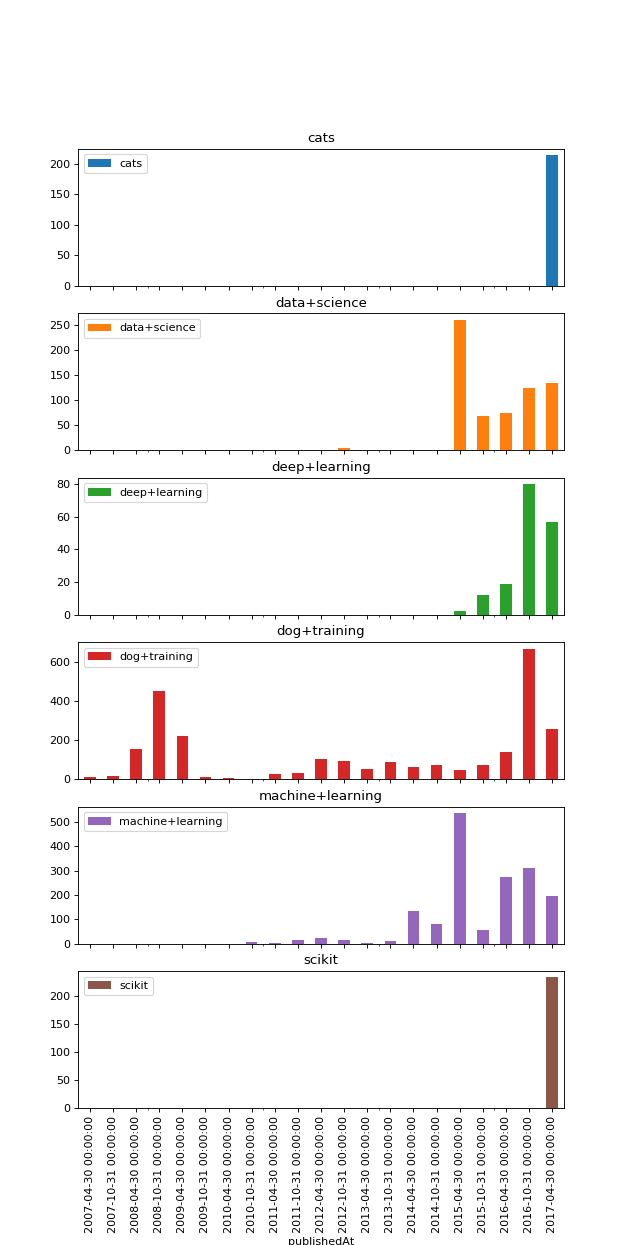

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa9949f5f8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7ffa9922de80>], dtype=object)

In [9]:
dt = df2.groupby(['query_q', pd.TimeGrouper('6M')]).count().unstack().videoId.T
dt.plot(subplots=True, kind='bar')